# Diagnostic Analysis of Video Game Ratings and Popularity Trend

## Name:
Connie Liang

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from scipy.stats.stats import pearsonr
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 

In [2]:
#This is the merged dataset
game = pd.read_csv('final.csv')

I am performing the analysis based on the assumption that games with better sales record have higher quality, since there is no ground truth that decides which games are better. There is a Total Shipped attribute and a Total Sales attribute. According to the Vgchartz website, some companies are only willing to provide one of the two attributes. Since there is troublesome amount of missing values in both columns, I decided to fill in the NAs of the Total Shipped column with the Total Sales value, then fill in the rest of the NAs with the average of the column. There are some repetitive entries since one game can have multiple genres. Therefore, I want to analyze the genre distribution of the games before eliminating repetition.

In [3]:
#Handling Missing Data
game['Total Shipped'] = game['Total Shipped'].fillna(game['Total Sales'])
#Convert string to float
shipped=[]
for records in list(game['Total Shipped']):
    records = str(records)
    shipped.append(float(records.strip('m')))

game['Total_Shipped']=shipped

game['Total_Shipped'] = game['Total_Shipped'].fillna(game['Total_Shipped'].mean())

game = game.drop(columns=['Total Shipped','Total Sales'])


In [4]:
game

,Unnamed: 0,App Id,Name,Genre,Release Date,Publisher,Developer,Total Negative,Total Positive,Total Reviews,Reviews,Metascore,Userscore,Total_Shipped
0,0,220,Half-Life 2,Shooter,"November 16, 2004",VU Games,Valve Software,1138,35141,36279,Overwhelmingly Positive,96,9.1,12.000000
1,2,220,Half-Life 2,Misc,"November 16, 2004",VU Games,Valve Software,1138,35141,36279,Overwhelmingly Positive,96,9.1,12.000000
2,3,271590,Grand Theft Auto V,Action,"April 13, 2015",Rockstar Games,Rockstar North,68518,197591,266109,Mostly Positive,96,7.8,12.600000
3,8,70,Half-Life,Shooter,"November 19, 1998",Sierra Entertainment,Valve Software,760,19503,20263,Overwhelmingly Positive,96,9.0,9.300000
4,10,70,Half-Life,Misc,"November 19, 1998",Sierra Entertainment,Valve Software,760,19503,20263,Overwhelmingly Positive,96,9.0,9.300000
5,11,7670,BioShock,Shooter,"August 21, 2007",2K Games,2K Australia / 2K Boston,592,9139,9731,Very Positive,96,8.6,1.290000
6,16,620,Portal 2,Shooter,"April 18, 2011",Valve,Valve Software,889,77285,78174,Overwhelmingly Positive,95,9.1,13.060000
7,19,72850,The Elder Scrolls V: Skyrim,Role-Playing,"November 10, 2011",Bethesda Softworks,Bethesda Game Studios,7438,88671,96109,Very Positive,94,8.3,3.990000
8,23,24980,Mass Effect 2,Role-Playing,"January 26, 2010",Electronic Arts,BioWare Corp.,464,7379,7843,Very Positive,94,8.9,0.390000
9,27,12110,Grand Theft Auto: Vice City,Action,"May 12, 2003",Rockstar Games,Rockstar North,557,4697,5254,Very Positive,94,8.8,0.040000


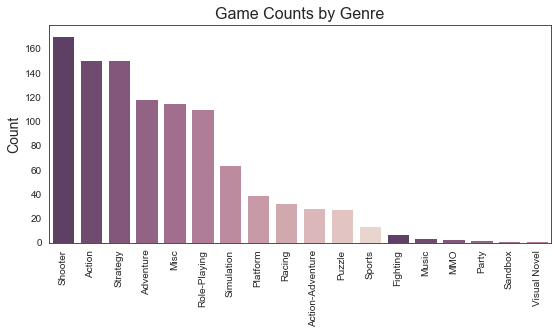

In [5]:
cols = ['Genre']

for col in cols:
    chart = game[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(9, 4))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.3, light=.85, reverse=True)).set_title(('Game Counts by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')

From the barplot, we can see that shooter, strategy, action, adventure and roleplaying are the most popular genres. Adventure, misc and role-playing also standout.

In [6]:
# Total Shipped By Genre
# Barplot with total_shipped as y variables, and 17 genres as x variables

k=0
k1=0
k2=0
k4=0
k5=0
k6=0
k7=0
k8=0
k10=0
k11=0
k12=0
k13=0
k14=0
k15=0
k16=0
k17=0
k18=0
k19=0
for i in range(len(list(game.Genre))):
    if list(game.Genre)[i]=='Action':
        k+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Action-Adventure':
        k1+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Adventure':
        k2+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Fighting':
        k4+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='MMO':
        k5+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Misc':
        k6+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Music':
        k7+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Party':
        k8+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Platform':
        k10+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Puzzle':
        k11+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Racing':
        k12+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Role-Playing':
        k13+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Sandbox':
        k14+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Shooter':
        k15+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Simulation':
        k16+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Sports':
        k17+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Strategy':
        k18+=list(game.Total_Shipped)[i]
    if list(game.Genre)[i]=='Visual Novel':
        k19+=list(game.Total_Shipped)[i]
        
total_shipped_bygenre=[k,k1,k2,k4,k5,k6,k7,k8,k10,k11,k12,k13,k14,k15,k16,k17,k18,k19]

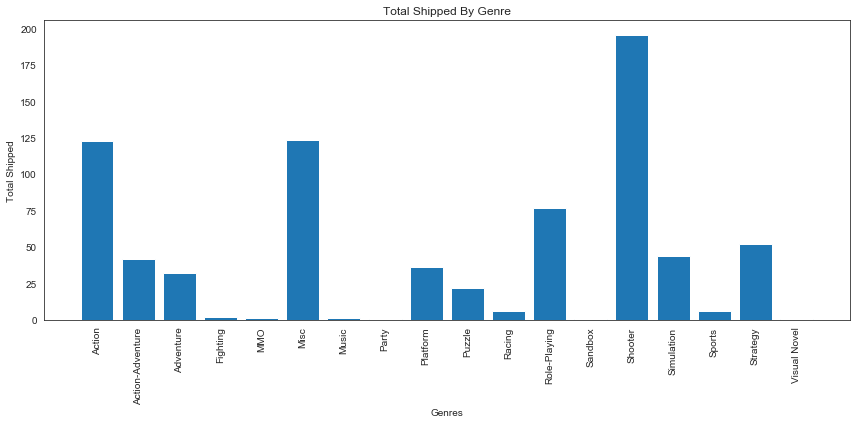

In [7]:
genre_index=sorted(list(set(list(game.Genre))))
plt.figure(figsize=(12,6))
x = np.arange(18)
plt.bar(x, total_shipped_bygenre)
plt.xticks(x, tuple(genre_index))
plt.xlabel('Genres')
plt.ylabel('Total Shipped')
plt.title('Total Shipped By Genre')
plt.xticks(rotation='vertical')

plt.tight_layout()

Despite the fact that there isn't much difference between the counts of shooter, action, and adventure games, Shooter game  approximately has a total of 196 millions sales, which takes up 25.7% of all game sales. Also, although the number of adventure game is almost equivalent to that of action game, action game has way better sales record than adventure game.
Some representative products of shooter game are PlayerUnknown's Battlerground and Counter-Strike: Global Offense.

In [8]:
x = Image(url= "https://www.talkesport.com/wp-content/uploads/csgo-breaks-record-for-highest-player-count-all-time.jpg", width=360, height=180)
y = Image(url= "https://i.ytimg.com/vi/SjKKbFe61GQ/maxresdefault.jpg", width=360, height=180)
display(y,x)

In [9]:
game = game.drop_duplicates("Name")

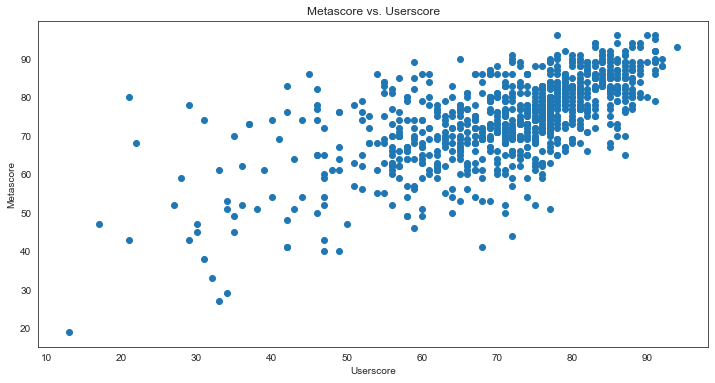

(0.6414850620289627, 4.530444051274915e-109)

In [10]:
#Relationship between Metascore and Userscore
game = game.astype({'Userscore':'float64'})
game["Userscore"] *= 10
game = game.astype({'Userscore':'int64'})
game = game.astype({'Metascore':'float64'})


plt.figure(figsize=(12,6))
plt.plot( 'Userscore','Metascore', data=game, linestyle='none', marker='o')
plt.xlabel('Userscore')
plt.ylabel('Metascore')
plt.title('Metascore vs. Userscore')
plt.show()

data1 = list(game['Userscore'])
data2 = list(game['Metascore'])
corr, _ = pearsonr(data1, data2)
corr, _

From the dotplot between metascore and userscore, we can see an overall positively related relationship with a correlation coefficient of 0.64. In other words, 64% of the metascore can be explained by the userscore. Although this coefficient is above 0.5, the graph still shows many data points sparesly spread all over the graph. My primary observation that there is controversy between metascore and userscore is thus proved. An example of this can be referred to the third row of the dataset. Grand Theft Auto V has a metascore of 96 and a userscore of 7.8, which means that critics recommend this game while users have mixed feelings.

Beside the metascore and the userscore, I have also gathered users reviews' from steam. Steam records the reviews as Total Positive, Total Negative, and Total Reviews. I decided to calculate the percent of positive reviews for each product when making comparison between the steam reviews and the scores from Metacritics, so that all the ratings are now in a 0 to 100 scale.

In [11]:
#Convert Steam Ratings
game["Total Positive"] = pd.to_numeric(game["Total Positive"], downcast="integer")
game["Total Reviews"] = pd.to_numeric(game["Total Reviews"], downcast="integer")
game['Positive Reviews(in %)']=(game['Total Positive']/game['Total Reviews'])*100
game

,Unnamed: 0,App Id,Name,Genre,Release Date,Publisher,Developer,Total Negative,Total Positive,Total Reviews,Reviews,Metascore,Userscore,Total_Shipped,Positive Reviews(in %)
0,0,220,Half-Life 2,Shooter,"November 16, 2004",VU Games,Valve Software,1138,35141,36279,Overwhelmingly Positive,96.0,91,12.000000,96.863199
2,3,271590,Grand Theft Auto V,Action,"April 13, 2015",Rockstar Games,Rockstar North,68518,197591,266109,Mostly Positive,96.0,78,12.600000,74.251904
3,8,70,Half-Life,Shooter,"November 19, 1998",Sierra Entertainment,Valve Software,760,19503,20263,Overwhelmingly Positive,96.0,90,9.300000,96.249321
5,11,7670,BioShock,Shooter,"August 21, 2007",2K Games,2K Australia / 2K Boston,592,9139,9731,Very Positive,96.0,86,1.290000,93.916350
6,16,620,Portal 2,Shooter,"April 18, 2011",Valve,Valve Software,889,77285,78174,Overwhelmingly Positive,95.0,91,13.060000,98.862793
7,19,72850,The Elder Scrolls V: Skyrim,Role-Playing,"November 10, 2011",Bethesda Softworks,Bethesda Game Studios,7438,88671,96109,Very Positive,94.0,83,3.990000,92.260870
8,23,24980,Mass Effect 2,Role-Playing,"January 26, 2010",Electronic Arts,BioWare Corp.,464,7379,7843,Very Positive,94.0,89,0.390000,94.083896
9,27,12110,Grand Theft Auto: Vice City,Action,"May 12, 2003",Rockstar Games,Rockstar North,557,4697,5254,Very Positive,94.0,88,0.040000,89.398553
10,29,8870,BioShock Infinite,Shooter,"March 25, 2013",2K Games,Irrational Games,2133,32909,35042,Very Positive,94.0,86,4.560000,93.913019
12,33,34440,Sid Meier's Civilization IV,Strategy,"October 25, 2005",2K Games,Firaxis Games,2,25,27,Positive,94.0,83,3.000000,92.592593


0.1984265142637534 0.13107863580112608 0.16558870768167855


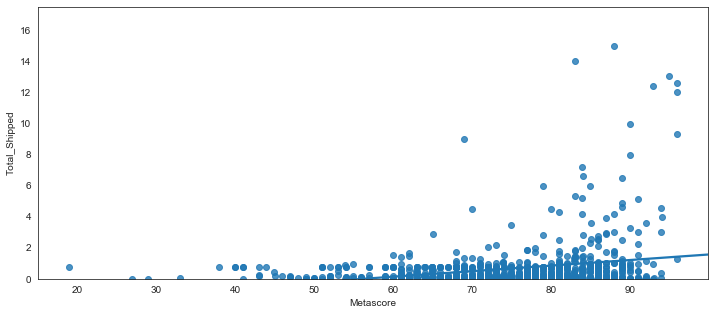

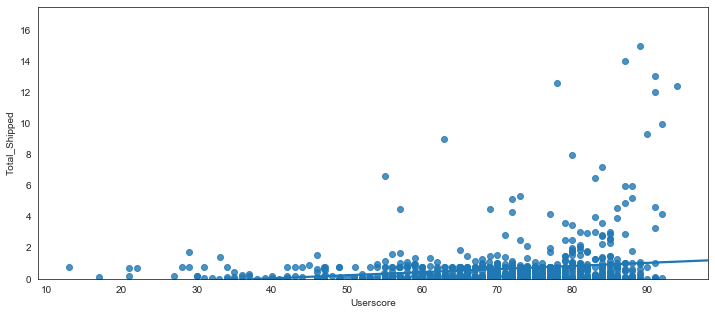

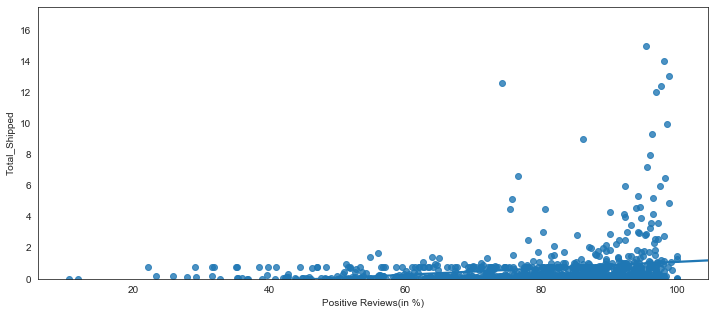

In [12]:
#Comparison between Metascore vs. Userscore
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x='Metascore', y='Total_Shipped', data=game, ci=None, x_jitter=.02).set(ylim=(0, 17.5))

game = game.astype({'Userscore':'float64'})
game['Userscore'] = game['Userscore'].replace('tbd', np.mean(pd.to_numeric(game['Userscore'], errors='coerce')))

fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x='Userscore', y='Total_Shipped', data=game, ci=None, x_jitter=.02).set(ylim=(0, 17.5))

data1 = list(game['Metascore'])
data2 = list(game['Total_Shipped'])
corr1, _1 = pearsonr(data1, data2)

data1 = list(game['Userscore'])
data2 = list(game['Total_Shipped'])
corr2, _2 = pearsonr(data1, data2)

fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x='Positive Reviews(in %)', y='Total_Shipped', data=game, ci=None, x_jitter=.02).set(ylim=(0, 17.5))
data1 = list(game['Positive Reviews(in %)'])
data2 = list(game['Total_Shipped'])
corr3, _3 = pearsonr(data1, data2)

print(corr1,corr2,corr3)

From the three dotplots that represent the relationship between Total Shipped and Metascore, Userscore, and Steam Reviews respectively, we can see that the relationships are all very weak. Among three different ratings, Metascore has the highest correlation coefficient of almost 0.2. This indicates that the Metascore has the best performance among all three in terms of predicting the Total Shipped value. Out of curious, I have also plotted the relationship between metascore and steam ratings and that between userscore and steam ratings.

In [13]:
game

,Unnamed: 0,App Id,Name,Genre,Release Date,Publisher,Developer,Total Negative,Total Positive,Total Reviews,Reviews,Metascore,Userscore,Total_Shipped,Positive Reviews(in %)
0,0,220,Half-Life 2,Shooter,"November 16, 2004",VU Games,Valve Software,1138,35141,36279,Overwhelmingly Positive,96.0,91.0,12.000000,96.863199
2,3,271590,Grand Theft Auto V,Action,"April 13, 2015",Rockstar Games,Rockstar North,68518,197591,266109,Mostly Positive,96.0,78.0,12.600000,74.251904
3,8,70,Half-Life,Shooter,"November 19, 1998",Sierra Entertainment,Valve Software,760,19503,20263,Overwhelmingly Positive,96.0,90.0,9.300000,96.249321
5,11,7670,BioShock,Shooter,"August 21, 2007",2K Games,2K Australia / 2K Boston,592,9139,9731,Very Positive,96.0,86.0,1.290000,93.916350
6,16,620,Portal 2,Shooter,"April 18, 2011",Valve,Valve Software,889,77285,78174,Overwhelmingly Positive,95.0,91.0,13.060000,98.862793
7,19,72850,The Elder Scrolls V: Skyrim,Role-Playing,"November 10, 2011",Bethesda Softworks,Bethesda Game Studios,7438,88671,96109,Very Positive,94.0,83.0,3.990000,92.260870
8,23,24980,Mass Effect 2,Role-Playing,"January 26, 2010",Electronic Arts,BioWare Corp.,464,7379,7843,Very Positive,94.0,89.0,0.390000,94.083896
9,27,12110,Grand Theft Auto: Vice City,Action,"May 12, 2003",Rockstar Games,Rockstar North,557,4697,5254,Very Positive,94.0,88.0,0.040000,89.398553
10,29,8870,BioShock Infinite,Shooter,"March 25, 2013",2K Games,Irrational Games,2133,32909,35042,Very Positive,94.0,86.0,4.560000,93.913019
12,33,34440,Sid Meier's Civilization IV,Strategy,"October 25, 2005",2K Games,Firaxis Games,2,25,27,Positive,94.0,83.0,3.000000,92.592593


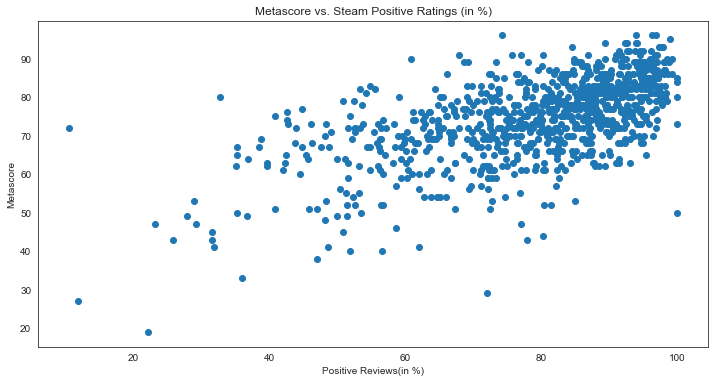

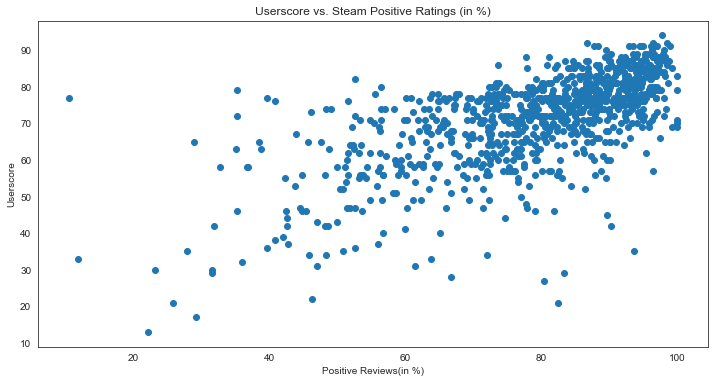

0.6086982280161961 0.658843797922491


In [14]:
plt.figure(figsize=(12,6))
plt.plot( 'Positive Reviews(in %)','Metascore', data=game, linestyle='none', marker='o')
plt.xlabel('Positive Reviews(in %)')
plt.ylabel('Metascore')
plt.title('Metascore vs. Steam Positive Ratings (in %)')
plt.show()

data1 = list(game['Positive Reviews(in %)'])
data2 = list(game['Metascore'])
corr, _ = pearsonr(data1, data2)

plt.figure(figsize=(12,6))
plt.plot( 'Positive Reviews(in %)','Userscore', data=game, linestyle='none', marker='o')
plt.xlabel('Positive Reviews(in %)')
plt.ylabel('Userscore')
plt.title('Userscore vs. Steam Positive Ratings (in %)')
plt.show()

data1 = list(game['Positive Reviews(in %)'])
data2 = list(game['Userscore'])
corr1, _1 = pearsonr(data1, data2)
print(corr,corr1)

The correlation coefficients between metascore and userscore and steam ratings are very close. This is reasonable because steam ratings are user-based too. We can see that the correlation coefficient between userscore and steam rating is 0.66, the highest among all three. I believer that critics review the games based on their graphics, plots, designs, and etc., so their reviews are more comprehensive and thorogh. On the other hand, users review the games purely based on their feelings, their reviews are personal and could be influenced by many factors. If one is looking for objective game reviews, critics reviews are more likely to be informative. 

Next, I originally planned to diagnose some information regarding different developer and publisher. Unfortunately, the graph shows that huge portion of the games is missing these two attribute values. It would be unreasonable to draw any conclusion in this situation.

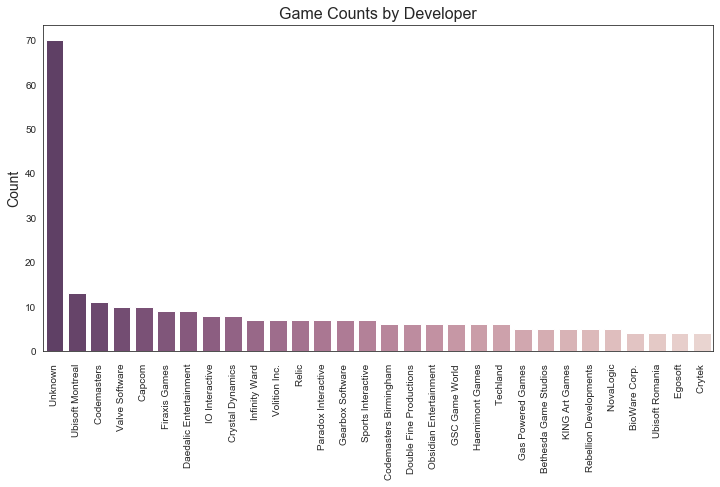

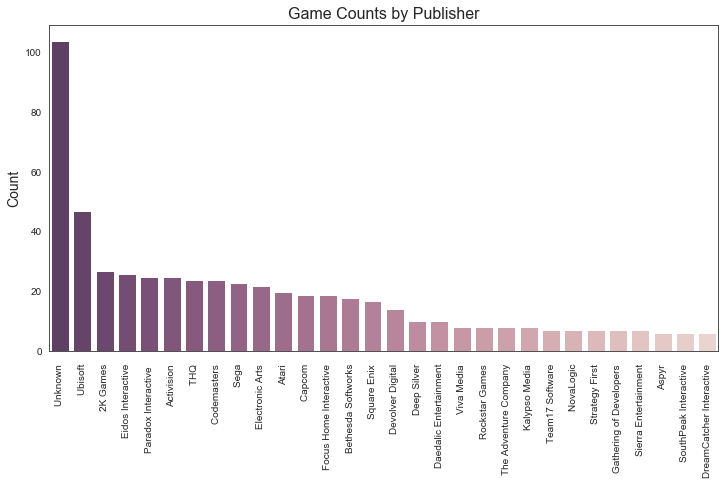

In [15]:
cols = [ 'Developer', 'Publisher']

for col in cols:
    chart = game[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    sns.set_style("white")
    plt.figure(figsize=(12,6))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.3, light=.85, reverse=True)).set_title(('Game Counts by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')

Nonetheless, based on both the graph and my personal knowledge, Ubisoft is indeed a leading game design company in the industry.

In order to make my research more pracically useful, I have decided to build a Decision Tree Model since none of the attribute can solemnly predict the total sales. I select the metascore, userscore and steam reviews as my input variables, and the Total Shipped as my output variable. To avoid overfitting, I decide to convert metascore and userscore into five categories. Between 0-19 is "Overwhelming Dislike", between 20-49 is "Generally Unfavorable", between 50-74 is "Mixed", between 75-89 is "Generally Favorable" and between 90-100 is "Universal Acclai". Steam has its own rating categories, so no conversion is needed. For the output variable Total_Shipped, with a max of 40 and a min of 0, I wanted to convert it into 4 categories. Between 0 to 9 is "Unfavorable", between 10 to 19 is "Below Average", between 20-29 is "Above Average", and between 30 to 40 is "Favorable".


In [16]:
train=game[["Name","Genre","Metascore","Userscore","Reviews","Total_Shipped"]]

In [17]:
#Categorize numbers
lst=list(train.Metascore)
metascore=[]
for i in lst:
    x = int(i)
    if (90<=x<=100):
        metascore.append("Universal Acclaim")
    if (75<=x<=89):
        metascore.append("Generally Favorable")
    if (50<=x<=74):
        metascore.append("Mixed")
    if (20<=x<=49):
        metascore.append("Generally Unfavorable")
    if (x<20):
        metascore.append("Overwhlming Dislike")
        
lst=list(train.Userscore)
userscore=[]
for i in lst:
    x = int(i)
    if (90<=x<=100):
        userscore.append("Universal Acclaim")
    if (75<=x<=89):
        userscore.append("Generally Favorable")
    if (50<=x<=74):
        userscore.append("Mixed")
    if (20<=x<=49):
        userscore.append("Generally Unfavorable")
    if (x<20):
        userscore.append("Overwhlming Dislike")
        
lst=list(train.Total_Shipped)
shipped=[]
for i in lst:
    x = int(i)
    if (39<x<=40):
        shipped.append("Favorable")
    if (19<x<=39):
        shipped.append("Above Average")
    if (10<=x<=19):
        shipped.append("Below Average")
    if (x<10):
        shipped.append("Unfavorable")

In [18]:
tree_train=pd.DataFrame({'Metascore':metascore,'Userscore':userscore,'Steam':list(train.Reviews),'TotalShipped':shipped})

In [19]:
#Create labels so that the attributes can be modeled into a decision tree model
metascore_label=LabelEncoder()
userscore_label=LabelEncoder()
steam_label=LabelEncoder()
shipped_label=LabelEncoder()
tree_train['Metascore']=metascore_label.fit_transform(tree_train['Metascore'])
tree_train['Userscore']=userscore_label.fit_transform(tree_train['Userscore'])
tree_train['Steam']=steam_label.fit_transform(tree_train['Steam'])
tree_train['TotalShipped']=shipped_label.fit_transform(tree_train['TotalShipped'])

In [20]:
#split the dataset into train and test
tree_train['split'] = np.random.randn(tree_train.shape[0], 1)

split = np.random.rand(len(tree_train)) <= 0.7

train = tree_train[split] #2/3 of the original dataset
test = tree_train[~split] #the rest 1/2

inputs = train.drop("TotalShipped",axis="columns")
outputs = pd.DataFrame(train["TotalShipped"])

In [21]:
inputs = inputs.drop("split",axis="columns")

|--- feature_1 <= 3.50
|   |--- feature_0 <= 3.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_1 <= 1.50
|   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_2 >  3.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  1.50
|   |   |   |   |--- feature_2 <= 5.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_2 >  5.00
|   |   |   |   |   |--- class: 2
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 2
|   |--- feature_0 >  3.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- feature_2 <= 1.00
|   |   |   |   |--- class: 2
|   |   |   |--- feature_2 >  1.00
|   |   |   |   |--- feature_1 <= 1.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  1.00
|   |   |   |   |   |--- class: 2
|   |   |--- feature_2 >  2.50
|   |   |   |--- class: 2
|--- featur

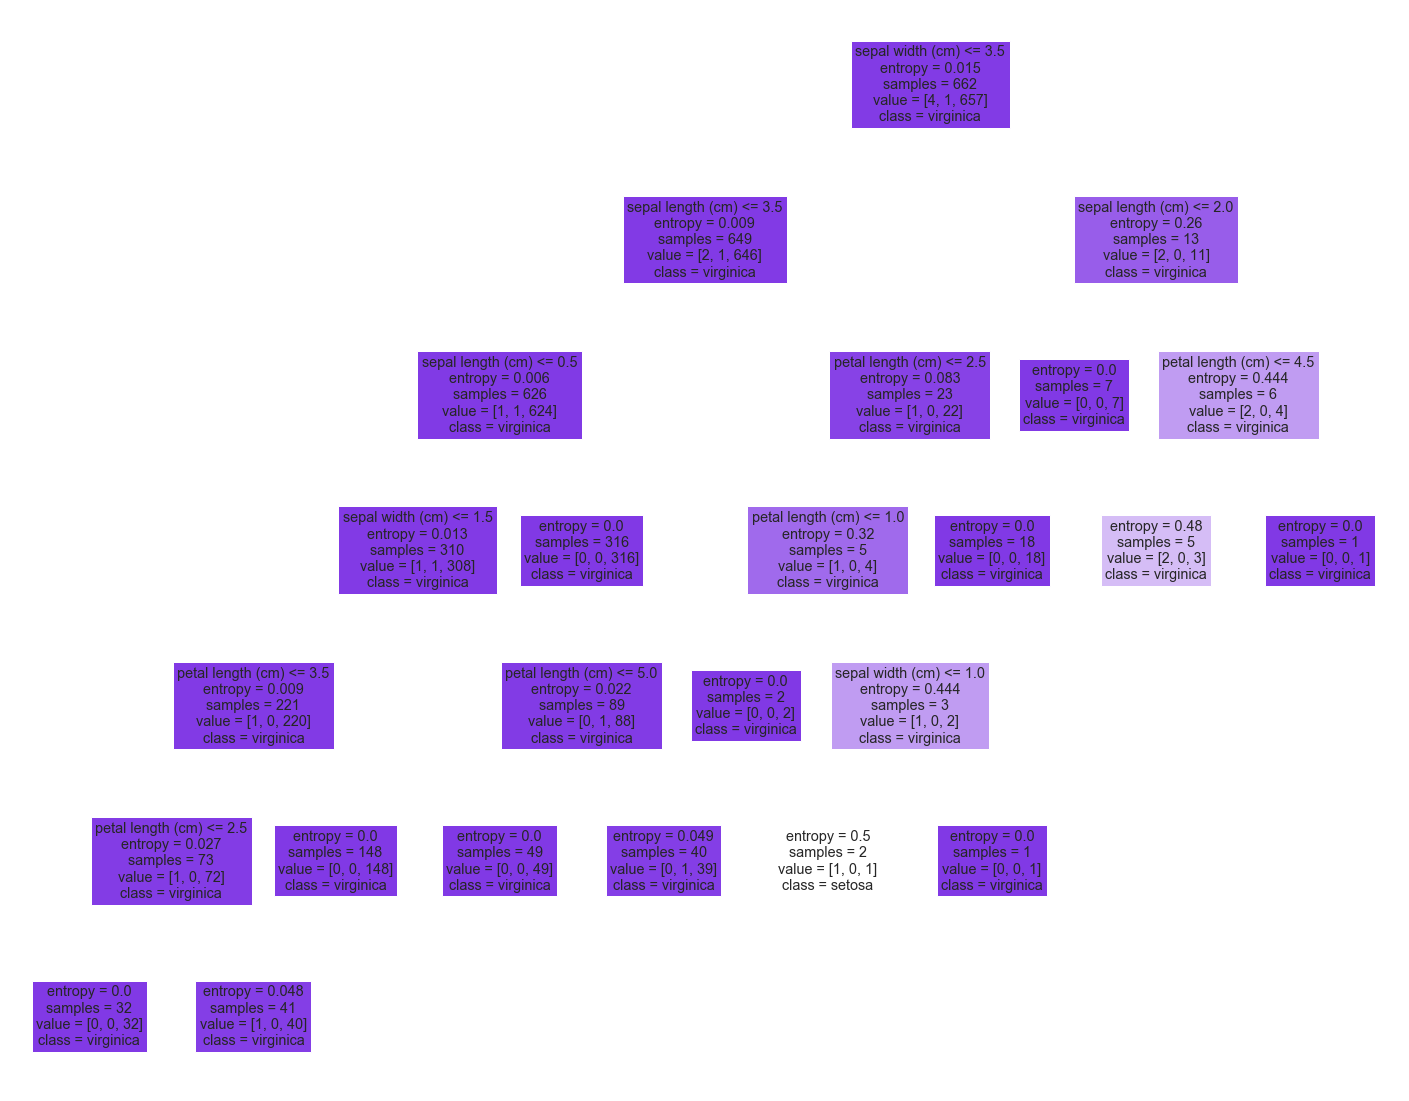

In [22]:
#use the train dataset to build the actual model
#test dataset can be use to test the model
model = tree.DecisionTreeClassifier()
model.fit(inputs, outputs)

model.score(inputs, outputs)

text_representation = tree.export_text(model)
print(text_representation)

iris = datasets.load_iris()
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [23]:
model.score(inputs,outputs)
#model.predict([[1,2,2]])

0.9924471299093656

The Decision Tree Model has a suprisingly high score. By using the model.predict() algorithm, I can predict the estimated sales of a game given its metascore, userscore, and steam reviews. Additionally, I apologize that I could not figure out why the decision tree figure is missing the branches.